# Assignment 1 - __M&M Factory QA__

- To calculate:

    - [ ] Color distribuition. Must warn if any color is missing
    
    - [ ] Average shape area in mm and organized by color
    
[Documentation online](https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html)
     
 A) Calibrate intrinsic paramenters and lens distortion of the camera. Show the intrinsic matrix and the lens distortion coeffiecients.
  

In [1]:
%pip install opencv-python
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Loading Image data/IntrinsicCalibration/calib_img_0.png


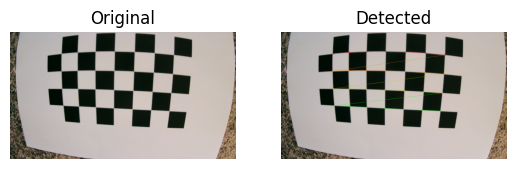

Loading Image data/IntrinsicCalibration/calib_img_1.png


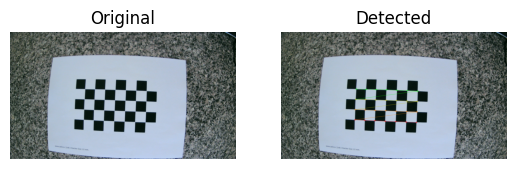

Loading Image data/IntrinsicCalibration/calib_img_2.png


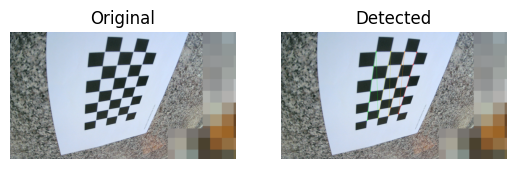

Loading Image data/IntrinsicCalibration/calib_img_3.png


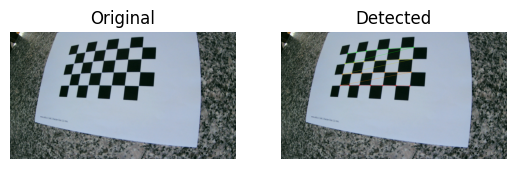

Loading Image data/IntrinsicCalibration/calib_img_4.png


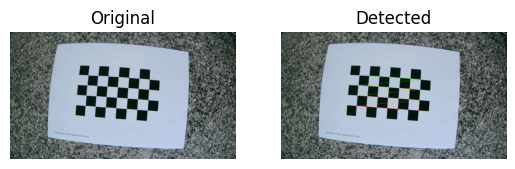

Loading Image data/IntrinsicCalibration/calib_img_5.png


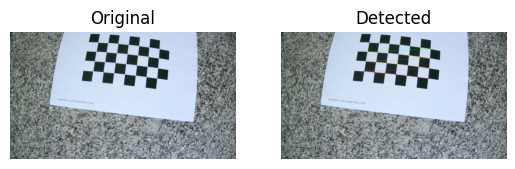

Loading Image data/IntrinsicCalibration/calib_img_6.png


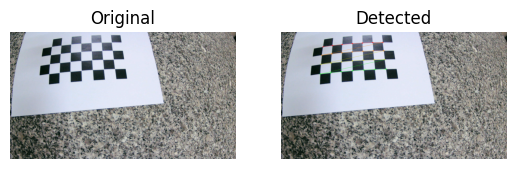

Loading Image data/IntrinsicCalibration/calib_img_7.png


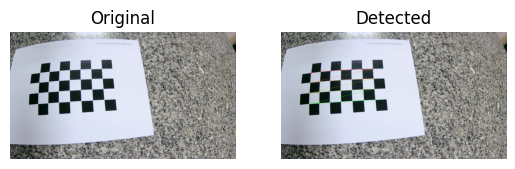

Loading Image data/IntrinsicCalibration/calib_img_8.png


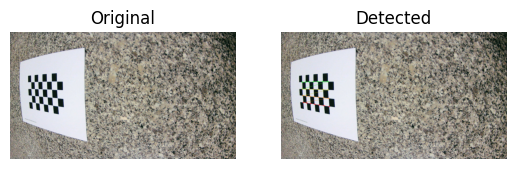

Loading Image data/IntrinsicCalibration/calib_img_9.png


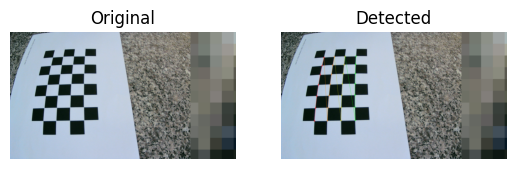

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import glob

grid_size = (7,4) # tuple that says the grid size (note these are interior corners)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((grid_size[1]*grid_size[0],3), np.float32)
objp[:,:2] = np.mgrid[0:grid_size[0],0:grid_size[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = sorted(glob.glob('data/IntrinsicCalibration/calib_img_[0-9].png'))

for fname in images:

    print(f"Loading Image {fname}")
    img = cv.imread(fname)
    
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCornersSB(gray, grid_size, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, grid_size, corners2, ret)
        
    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected')
    plt.show()
    
    



In [3]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


Loading Image data/IntrinsicCalibration/calib_img_0.png


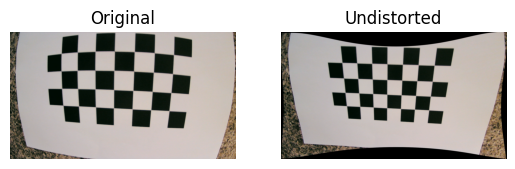

Loading Image data/IntrinsicCalibration/calib_img_1.png


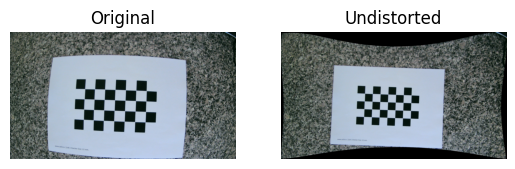

Loading Image data/IntrinsicCalibration/calib_img_2.png


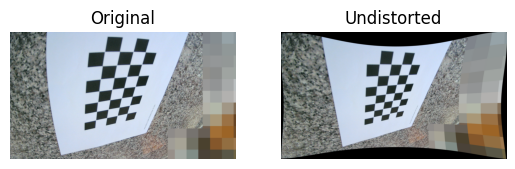

Loading Image data/IntrinsicCalibration/calib_img_3.png


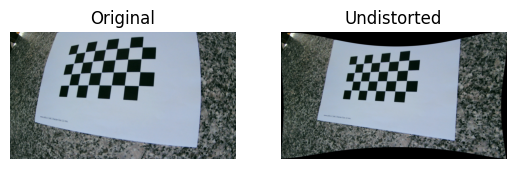

Loading Image data/IntrinsicCalibration/calib_img_4.png


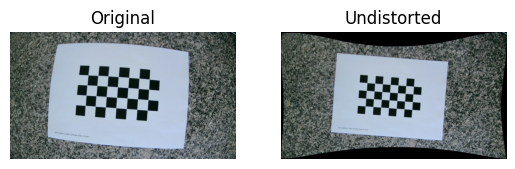

Loading Image data/IntrinsicCalibration/calib_img_5.png


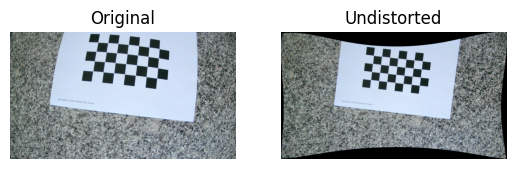

Loading Image data/IntrinsicCalibration/calib_img_6.png


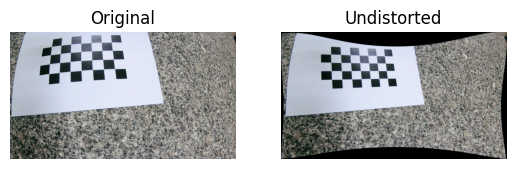

Loading Image data/IntrinsicCalibration/calib_img_7.png


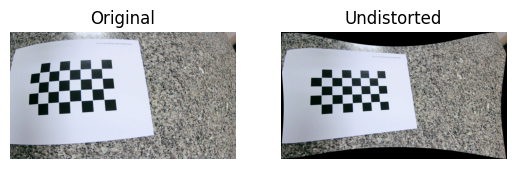

Loading Image data/IntrinsicCalibration/calib_img_8.png


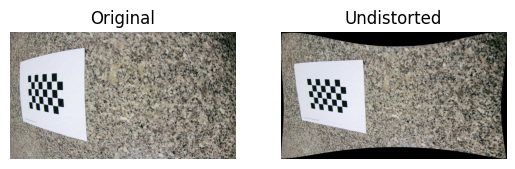

Loading Image data/IntrinsicCalibration/calib_img_9.png


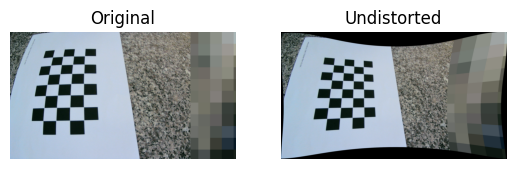

In [5]:
images = sorted(glob.glob('data/IntrinsicCalibration/calib_img_[0-9].png'))

for fname in images:

    print(f"Loading Image {fname}")
    img = cv.imread(fname)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    #x, y, w, h = roi
    #dst = dst[y:y+h, x:x+w]
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
    plt.title("Undistorted")
    plt.show()



Loading Image data/WhiteBackground/calib_img_3.png
band_red = [0, 21]
21
band_blue = [138, 145]
band_yellow = [24, 31]
band_green = [77, 92]


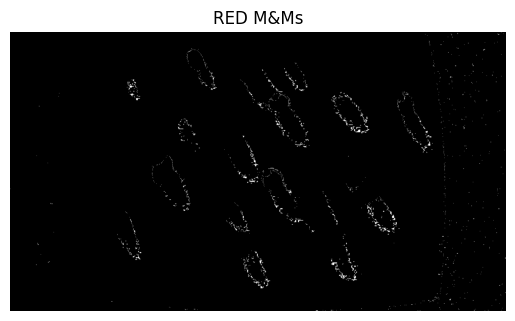

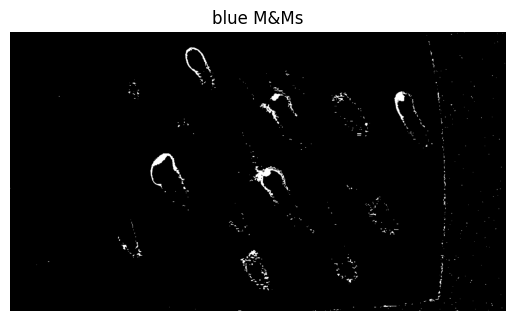

In [101]:
import cv2 as cv
import glob
import numpy as np
from matplotlib import pyplot as plt

# White background 
# we can try and help the blob detection by filtering the image by color 
# to do that we convert the image to HSV and threshold the image with 
# the values that we hope our m&ms will appear

def plot_results():
    # Display image using plt
    plt.figure()

    plt.subplot(241)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(242)
    plt.imshow(hue, cmap ="gray")
    plt.title("Hue")
    plt.axis("off")
    
    plt.subplot(243)
    plt.imshow(sat, cmap="gray")
    plt.title("Saturation")
    plt.axis("off")

    plt.subplot(244)
    plt.imshow(mask_sat, cmap= "gray")
    plt.title("Sat Mask")
    plt.axis("off")

    plt.subplot(245)
    plt.imshow(mask_red, cmap="gray")
    plt.title("Red M&Ms")
    plt.axis("off")

    plt.subplot(246)
    plt.imshow(mask_blue, cmap="gray")
    plt.title("Blue M&Ms")
    plt.axis("off")
    
    plt.subplot(247)
    plt.imshow(mask_yellow, cmap="gray")
    plt.title("Yellow M&Ms")
    plt.axis("off")

    plt.subplot(248)
    plt.imshow(mask_green, cmap="gray")
    plt.title("Green M&Ms")
    plt.axis("off")

    plt.show()


images = sorted(glob.glob('data/WhiteBackground/calib_img_3.png'))

for fname in images:
    print(f"\n\nLoading Image {fname}")
    img = cv.imread(fname) # read image is BGR
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    hue, sat, val = cv.split(hsv)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    final = cv.cvtColor(gray,cv.COLOR_GRAY2RGB)
    ratio_deg2h = 255/360
    #the Hue is the component that can help us separate the candies.
    central_red = 10# MUST be in 0 to 360 range
    band_red = 40 # degrees of the range covered
    band_red = [int(np.max([(central_red-band_red)*ratio_deg2h,0])),int(np.min([(central_red+band_red)*ratio_deg2h,255]))] # band converted to hsv values

    central_blue = 200 # MUST be in 0 to 360 range
    band_blue = 5 # degrees of the range covered
    band_blue = [int(np.max([(central_blue-band_blue)*ratio_deg2h,0])),int(np.min([(central_blue+band_blue)*ratio_deg2h,255]))] # percentage of the range covered

    central_yellow = 40 # MUST be in 0 to 360 range
    band_yellow = 5 # degree of the range covered
    band_yellow = [int(np.max([(central_yellow-band_yellow)*ratio_deg2h,0])),int(np.min([(central_yellow+band_yellow)*ratio_deg2h,255]))] # percentage of the range covere

    central_green = 120 # MUST be in 0 to 360 range
    band_green = 10 # degrees of the range covered
    band_green = [int(np.max([(central_green-band_green)*ratio_deg2h,0])),int(np.min([(central_green+band_green)*ratio_deg2h,255]))] # percentage of the range covered

    # We can assume that the M&M will be the most saturated thing 
    # in the picture. To address this we implement a high pass filter 
    # on the saturation channel

    low_saturation = 50 # percentage
    low_saturation = int(np.min([255,low_saturation*2.55]))# in 0, 255 range 
    
    print(f"{band_red = }")
    print(band_red[1])
    print(f"{band_blue = }")
    print(f"{band_yellow = }")
    print(f"{band_green = }")



    _, mask_sat = cv.threshold(sat, low_saturation, 255, cv.THRESH_BINARY_INV)
    _, mask_red = cv.threshold(hue, band_red[0],band_red[1], cv.THRESH_BINARY_INV)
    _, mask_blue = cv.threshold(hue, band_blue[0],band_blue[1], cv.THRESH_BINARY)
    _, mask_yellow = cv.threshold(hue, band_yellow[0],band_yellow[1], cv.THRESH_BINARY)
    _, mask_green = cv.threshold(hue, band_green[0],band_green[1], cv.THRESH_BINARY)


    # define range of red color in HSV from 0-180 range
    # lower_red = np.array([np.max([0,(central_red-band_red)]), low_saturation, 0])
    # upper_red = np.array([np.min([180,(central_red+band_red)]),255,255])

    # lower_blue = np.array([np.max([0,(central_blue-band_blue)]), low_saturation, 0])
    # upper_blue = np.array([np.min([180,(central_blue+band_blue)]),255,255])
    
    # lower_yellow = np.array([np.max([0,(central_yellow-band_yellow)]) ,low_saturation  ,0  ])
    # upper_yellow = np.array([np.min([180,(central_yellow+band_yellow)]) ,255,255])
    
    # lower_green = np.array([np.max([0,(central_green-band_green)]) ,low_saturation  ,0  ])
    # upper_green = np.array([np.min([180,(central_green+band_green)]) ,255,255])

    # Threshold the HSV image using inRange function to get only red colors
    # mask_red = cv.inRange(hsv, lower_red, upper_red )
    # mask_blue = cv.inRange(hsv, lower_blue, upper_blue )
    # mask_yellow = cv.inRange(hsv, lower_yellow, upper_yellow )
    # mask_green = cv.inRange(hsv, lower_green, upper_green )
    
    #plot_results()

    plt.imshow(mask_red, cmap="gray")
    plt.title("RED M&Ms")
    plt.axis("off")
    plt.show()

    plt.imshow(mask_blue, cmap="gray")
    plt.title("blue M&Ms")
    plt.axis("off")
    plt.show()

